#                             Indian Cuisines
![](https://i.giphy.com/X43Yzx0G2wG4.gif)

<br>
Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions. Centuries of Islamic rule, particularly by the Mughals, also introduced dishes like samosa and pilaf.

**This Notebook will help you to find some interesting fact about indian dishes and much more**<br>


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing Libraries...**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS 
import requests

**Loading the Data....**

In [ ]:
df=pd.read_csv("../input/indian-food-101/indian_food.csv")
df.head(10)

In [ ]:
print("Shape of data:{}".format(df.shape))

In [ ]:
print("Total No. of different dishes {}".format(df.shape[0]))

# Data Cleaning

**Unique values contained by different columns: **

In [ ]:
col=['diet', 'prep_time', 'cook_time',
     'flavor_profile', 'course', 'state', 'region']
for i in col:
    print("Unique Values Contaied by Column '{}' are \n {}".format(i,df[i].unique()))
    print()
    


In [ ]:
print("Replacing -1 with np.nan in all those columns which contain this value ")
for i in col:
    df[i].replace(-1,np.NaN,inplace=True)

**Number of Null values in different colums**

In [ ]:

# df.isnull().sum()
# plt.figure(figsize=(10,10))
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.style.background_gradient(cmap='seismic')
# plt.title("Value counts")

# Ingredients Analysis

![Ingredients](https://www.trainingjournal.com/sites/www.trainingjournal.com/files/styles/original_-_local_copy/entityshare/30051%3Fitok%3Da1-NdjWT)
<br>
An ingredient is a substance that forms part of a mixture. For example, in cooking, recipes specify which ingredients are used to prepare a specific dish

In [ ]:
print("Total No. of ingredients as given in data used in different dishes is {}".format(df['ingredients'].unique().shape[0]))

In [ ]:
from PIL import Image
ingredients = []
print("Which ingredients used in  Indian dishes?")
for i in range(df['ingredients'].shape[0]):
    text = df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

    
mask = np.array(Image.open(requests.get('https://cdn5.vectorstock.com/i/1000x1000/06/69/map-india-in-blue-colour-vector-29580669.jpg', stream=True).raw)) 
wordcloud = WordCloud(width = 400, height = 400, colormap = 'spring'
                      ,background_color ='white',mask=mask, 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (15, 15), facecolor = None) 
plt.title("Ingredients used in India",size=15)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [ ]:
m=-1
# print(type(m))
index=-1
for i in range(0,df['ingredients'].shape[0]):
    lst=df['ingredients'][i].split(',')
    x=len(lst)
#     print(x)
    if m<x:
        m=x
        index=i
        
# print(index,m)
print("Maximum no. of ingridents is used by {} dish \nThey are {}".format(df['name'][index],df['ingredients'][index]))
print("{} is {} dish and belongs to {},{} region".format(df['name'][index],df['diet'][index],df['state'][index],df['region'][index]))
print("It is a {} dish and falls under {} course".format(df['flavor_profile'][index],df['course'][index]))
print("Time taken by it to prepare is {} mins and to cook is {} mins. ".format(df['prep_time'][index],df['cook_time'][index]))


In [ ]:

ingredients = []
print("Which ingredients used in  Indian vegetarian dishes?")
for i in range(df['ingredients'].shape[0]):
    if (df['diet'][i]=='vegetarian'):
        text = df['ingredients'][i].split(',')
        text = ','.join(text)
        ingredients.append(text)
        text = ' '.join(ingredients)
        

mask = np.array(Image.open(requests.get('https://i.pinimg.com/originals/ed/55/1b/ed551ba4c17f8ed5c2fa44212fb8e787.jpg', stream=True).raw))    
wordcloud = WordCloud(width = 400, height = 400, colormap = 'seismic'
                      ,background_color ='black',mask=mask,
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Ingredients used in Vegeterian dishes',size=15)
plt.axis('off') 
plt.show()

In [ ]:

ingredients = []
print("Which ingredients used in  Indian non-vegetarian dishes?")
for i in range(df['ingredients'].shape[0]):
    if (df['diet'][i]=='non vegetarian'):
        text = df['ingredients'][i].split(',')
        text = ','.join(text)
        ingredients.append(text)
        text = ' '.join(ingredients)
        
    
mask = np.array(Image.open(requests.get('https://i.pinimg.com/originals/3f/5a/a2/3f5aa225c77a1966f66f6f7c49256b59.png', stream=True).raw))
wordcloud = WordCloud(width = 400, height = 400, colormap = 'spring'
                      ,background_color ='white',mask=mask, 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('Ingredients used in Non-Vegeterian dishes',size=15)
plt.axis('off') 
plt.show()

# Time Analysis

![](https://media1.tenor.com/images/ac38e0f146cbef946cf78c0176fad1af/tenor.gif?itemid=12295338)

In [ ]:
df['Total Time']=df['prep_time']+df['cook_time']
df['Total Time']

In [ ]:
print('The dish which takes the max. prep. time  is {} and time taken={} minutes'.format(df['name'][df['prep_time'].idxmax()],df['prep_time'][df['prep_time'].idxmax()]))
print('The dish which takes the min. prep. time  is {} and time taken={} minutes'.format(df['name'][df['prep_time'].idxmin()],df['prep_time'][df['prep_time'].idxmin()]))
print('\n\nThe dish which takes the max. cook time  is {} and time taken={} minutes'.format(df['name'][df['cook_time'].idxmax()],df['cook_time'][df['cook_time'].idxmax()]))
print('The dish which takes the min. cook time  is {} and time taken={} minutes'.format(df['name'][df['cook_time'].idxmin()],df['cook_time'][df['cook_time'].idxmin()]))
print('\n\nThe dish which takes the max. total time  is {} and time taken={} minutes'.format(df['name'][df['Total Time'].idxmax()],df['Total Time'][df['Total Time'].idxmax()]))
print('The dish which takes the min. total time  is {} and time taken={} minutes'.format(df['name'][df['Total Time'].idxmin()],df['Total Time'][df['Total Time'].idxmin()]))

# **List of Vegeterian and Non-vegeterian dishes**

In [ ]:
veg_dishes=[]
nonveg_dishes=[]
c=0
for i in df['name']:
    x=df['diet'][c]
#     print(type(x))
    if(x=='vegetarian'):
        veg_dishes.append(i)
    if(x=='non vegetarian'):
        nonveg_dishes.append(i)
    c+=1
    

print("Total Number of Vegetarian Dishes: {}\nTotal Number of Non-Vegetarian Dishes: {}".format(len(veg_dishes),len(nonveg_dishes)))
print('List of Veget')

In [ ]:
from pandas import DataFrame
DataFrame(veg_dishes,columns=['Veg Dishes'])

In [ ]:
DataFrame(nonveg_dishes,columns=['Non-Veg Dishes'])

In [ ]:
Tasks = [226,29]
my_labels = 'Vegeterian dishes','Non-vegeterian dishes'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Vegeterian dishes Vs Non-vegeterian dishes')
plt.axis('equal')
plt.show()

# Number of Vegeterian and Non-vegeterian dishes in different state

In [ ]:
plt.figure(figsize=(15,10))
df.groupby('state').diet.value_counts().plot.bar()
plt.show()

In [ ]:
# plt.figure(figsize=(15,60))
g=sns.catplot('state',hue='diet',data=df,kind='count',palette="pastel")
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
plt.ylabel('Count',size=15)
plt.xlabel('State',size=15)
plt.title('Number of vegeterian and non-vegeterian dishes in different states',size=15)
plt.xticks(rotation=45,)
plt.tight_layout()
plt.show()
print("Gujarat has maximum no. of vegetarian dishes\nAssam has maximum no. of non-vegetarian dishes")


In [ ]:
index1=-1
m1=-1
index2=-1
m2=-1
c=-1
for i in range(df['diet'].shape[0]):
    if df['diet'][i]=='vegetarian':
        lst=df['ingredients'][i].split(',')
        l=len(lst)
        if m1<l:
            m1=l
            index1=i
    elif df['diet'][i]=='non vegetarian':
        lst=df['ingredients'][i].split(',')
        l=len(lst)
        if m2<l:
            m2=l
            index2=i
print("Which vegeterian and non-vegetarian dish uses maximum number of ingredients?\n")
print("{} is a vegetarian dish which uses {} types of ingredients which is max. among all vegetarian dishes".format(df['name'][index1],m1))
print("{} is a non vegetarian dish which uses {} types of ingredients which is max. among all non vegetarian dishes".format(df['name'][index2],m2))

> **Ghevar**
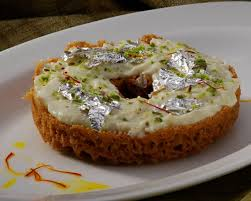

> **Maach Jhol**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT0QvgbsepO2fsAzbgOgNkjCC8SAWCdYKUpLA&usqp=CAU)

# Flavor Analysis

In [ ]:
s=df['flavor_profile'].value_counts()
plt.figure(figsize=(15,7))
ax=sns.countplot(x='flavor_profile',data=df,palette='Set3',order=df['flavor_profile'].value_counts().index)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.flavor_profile + 0.2 , v.flavor_profile, color='black',size=20)
plt.xticks(size=15,rotation=50)
plt.tight_layout()
plt.xlabel('Flavor Profile\n',size=20)
plt.ylabel('Count',size=20)
plt.title('Counting of different flavor profile dishes',size=20)


In [ ]:
# print("Distribution of dishes based on their flavor profile--->")
plt.figure(figsize=(10,10))
df.groupby('flavor_profile').diet.value_counts().plot.bar()
plt.title("Distribution of dishes based on their flavor profile")


In [ ]:
# Counting of ingredients used in different flavor_profile analysis
bitter=0
sour=0
spicy=0
sweet=0
for i in range(df['flavor_profile'].shape[0]):
    if df['flavor_profile'][i]=="bitter":
        lst=df['ingredients'][i].split(',')
        x=len(lst)
        bitter+=x
    elif df['flavor_profile'][i]=="sour":
        lst=df['ingredients'][i].split(',')
        x=len(lst)
        sour+=x
    elif df['flavor_profile'][i]=="spicy":
        lst=df['ingredients'][i].split(',')
        x=len(lst)
        spicy+=x
    elif df['flavor_profile'][i]=="sweet":
        lst=df['ingredients'][i].split(',')
        x=len(lst)
        sweet+=x
        
print(bitter,spicy,sweet,sour)
Tasks = [20,644,345,2]
my_labels = 'bitter','spicy','sweet','sour'
sizes=[20,35,30,15]
my_colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
my_explode = (0, 0.1,0,0)
plt.figure(figsize=(9,9))
plt.pie(sizes, explode=my_explode, labels=my_labels, colors=my_colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Ingredients used in different flavor profile',size=15)
plt.axis('equal')




        

# State Wise Dish Analysis

In [ ]:
print("Total No. of different states given in data is {}".format(df['state'].unique().shape[0]))

In [ ]:
s=df['state'].value_counts()
plt.figure(figsize=(20,7))
ax=sns.countplot(x='state',data=df,palette='Set1',order = df['state'].value_counts().index)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.state + 0.2 , v.state, color='black',size=20)
plt.xticks(size=10,rotation=30)
plt.tight_layout()
plt.xlabel('State\n',size=20)
plt.ylabel('Count',size=20)
plt.title('Counting of state wise dishes',size=20)
print('State which is the origin of most dishes with frequency is {}'.format(df['state'].value_counts()[df['state'].value_counts() == df['state'].value_counts().max()]))
print('State which is the origin of minimum dishes with frequency are \n{}'.format(df['state'].value_counts()[df['state'].value_counts() == df['state'].value_counts().min()]))




# **Name of dishes in different state**

In [ ]:
dicti={}
for i in df['state'].unique():
    dicti[i]=[]
for i in range(df['state'].shape[0]):
    dicti[df['state'][i]].append(df['name'][i])
for i in df['state'].unique():
    print("{}: {}".format(i,dicti[i]))
    print("\n\n")



In [ ]:


plt.figure(figsize=(20,20))
sns.countplot(y='state',hue='flavor_profile',palette='gist_rainbow_r',data=df)
plt.yticks(size=10)
plt.ylabel('State',size=25)
plt.xlabel('Count',size=25)
plt.title("State wise distribution of dishes based on flavor profile",size=15)
# plt.tight_layout()


# Dishes analysation based on region

In [ ]:
print(df['region'].value_counts())
Tasks = [74,59,49,31,25,3]
my_labels = 'West','South','North','East','North East','Central'
plt.figure(figsize=(8,8))
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=10, shadow = True)
plt.title('Dishes distribution in each region',size=15)
plt.tight_layout()
plt.axis('equal')
plt.show()
print("West region of India contains max. no dishes\nCentral Region of India Contain min. no of dishes")

In [ ]:
print(df.groupby('region').flavor_profile.value_counts().to_frame())
plt.figure(figsize=(12,8))
sns.countplot(y='region',hue='diet',palette='nipy_spectral_r',data=df)
plt.yticks(size=10)
plt.ylabel('Region',size=25)
plt.xlabel('Count',size=25)
plt.title("Region wise distribution of dishes based on diet",size=15)
# plt.tight_layout()


# *Please Upvote!*, if you found this notebook helpful!

**Thank You!**